#package install and import

In [35]:
#install
!pip install seaborn
!pip install graphviz
!pip install dtreeviz

In [36]:
# Importing packages
import numpy as np
import os
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import random
from math import sqrt 
import graphviz
from dtreeviz.trees import dtreeviz 

%matplotlib inline
def seed_everything(seed=666):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    #torch.manual_seed(seed)
    #torch.cuda.manual_seed(seed)
    #torch.backends.cudnn.deterministic = True
seed_everything()


#DATA exploration , analysis and preparation

In [37]:
#get data
f = pd.read_csv("/content/elec_devices_all.csv")
f = f.sort_values(by =['year',"month"]) 
data=DataFrame(f)

income


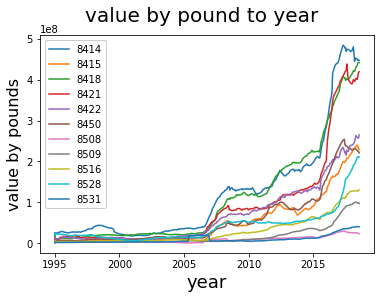

In [38]:
print("income")
store_list = data['product_code'].unique()
for s in store_list:
  mm=data.loc[data['income_outcome'] == 1]
  df=mm[mm.eq(s).any(1)][["y","year"]]
  df=df.rolling(center=False, window=20, min_periods=1).mean() 
  plt.plot(df["year"], df["y"], label=s)
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100
plt.suptitle('value by pound to year', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('value by pounds', fontsize=16)
plt.legend(framealpha=1, frameon=True);



outcome


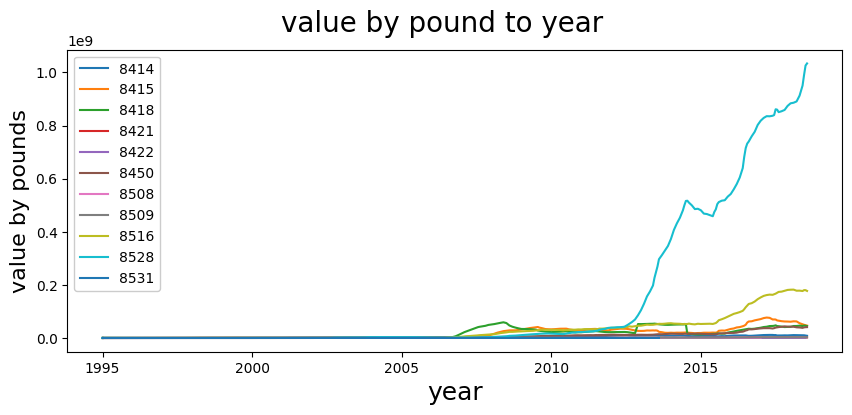

In [39]:

print("outcome")
store_list = data['product_code'].unique()
for s in store_list:
  mm=data.loc[data['income_outcome'] == 0]
  df=mm[mm.eq(s).any(1)][["y","year"]]
  df=df.rolling(center=False, window=20, min_periods=1).mean() 
  plt.plot(df["year"], df["y"], label=s)
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100
plt.suptitle('value by pound to year', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('value by pounds', fontsize=16)
plt.legend(framealpha=1, frameon=True);

8414


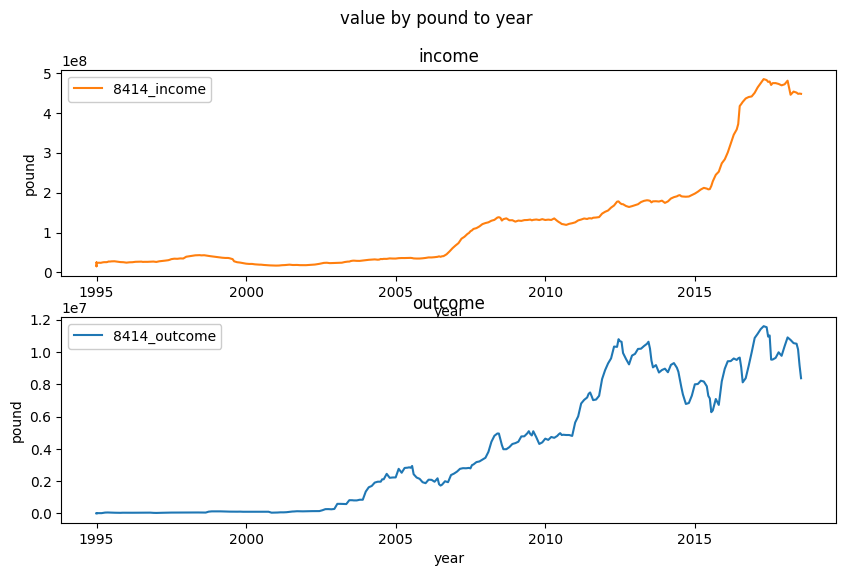

In [40]:

id=0
store_list = data['product_code'].unique()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("value by pound to year")
fig.set_size_inches(10,6)
for s in store_list:
  id_m=store_list[id]
  print(id_m)
  df=data[data.eq(id_m).any(1)][["y","year","income_outcome"]]
  df1=df.loc[df['income_outcome'] == 1]
  df2=df.loc[df['income_outcome'] == 0]
  df1=df1.rolling(center=False, window=20, min_periods=1).mean() 
  df2=df2.rolling(center=False, window=20, min_periods=1).mean() 
  ax1.plot(df1["year"], df1["y"],'tab:orange',label=str(id_m)+"_income"),
  ax2.plot(df2["year"], df2["y"],label=str(id_m)+"_outcome")

  ax1.set_xlabel('year')
  ax1.set_ylabel('pound')
  ax2.set_xlabel('year')
  ax2.set_ylabel('pound')

  ax1.set_title('income')
  ax2.set_title('outcome')
  ax1.legend(framealpha=1, frameon=True,loc="upper left")
  ax2.legend(framealpha=1, frameon=True,loc="upper left")

  break



*Getting non-object elements*


In [41]:
X_data=data.dtypes[data.dtypes!='object'].index
X_train=data[X_data]

In [42]:
X_train.describe()

,year,month,product_code,y,income_outcome
count,5766.000000,5766.000000,5766.000000,5.766000e+03,5766.000000
mean,2007.324662,6.494277,8462.729102,4.722315e+07,0.569546
std,7.106893,3.435575,48.081004,1.139404e+08,0.495183
min,1995.000000,1.000000,8414.000000,6.000000e+01,0.000000
25%,2001.000000,4.000000,8418.000000,1.228878e+06,0.000000
50%,2008.000000,6.500000,8450.000000,8.772566e+06,1.000000
75%,2013.000000,9.000000,8516.000000,3.809891e+07,1.000000
max,2019.000000,12.000000,8531.000000,1.578365e+09,1.000000


In [43]:
# Finding all the columns with NULL values
np.sum(X_train.isnull())

year              0
month             0
product_code      0
y                 0
income_outcome    0
dtype: int64

In [44]:
# Filling all Null values
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['y']
X_train.drop(['y'],axis=1,inplace=True)

In [45]:
#split train test
number_of_samples = len(y)
np.random.seed(0)
X_Train=X_train.values
X_Train=np.asarray(X_Train)
#random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[0:num_training_samples]
y_train=y[0:num_training_samples]
x_test=X_Train[num_training_samples:]
y_test=y[num_training_samples:]
y_Train=list(y_train)
y_test=list(y_test)
y_train=list(y_train)

In [46]:
#simple analysis
true_id=[8418, 8450, 8516, 8421, 8422, 8528, 8531, 8508, 8509, 8414, 8415]
li_tr=[0]*11
li_te=[0]*11
def get(true,strs):
  for i in range(len(true)):
    if true[i]==strs:
      return i
  return 0    
for i in x_train:
  li_tr[get(true_id,i[2])]+=1

for i in x_test:
  li_te[get(true_id,i[2])]+=1
print("product codes: ")
print(true_id)
print("train product number for each code: ")
print(li_tr)
print("test product number for each code: ")
print(li_te)
sum =[x + y for x, y in zip(li_tr, li_te)]
print("sum of train and test each code: ")
print(sum)
print("precentage for each code: ")
print( ["{:.4f}".format(x / 5766) for x in sum])
print("products in order by size of sum")
for i in reversed(sorted(range(len(sum)), key=lambda k: sum[k])) :
  print(true_id[i])

product codes: 
[8418, 8450, 8516, 8421, 8422, 8528, 8531, 8508, 8509, 8414, 8415]
train product number for each code: 
[446, 415, 434, 429, 356, 415, 263, 295, 399, 428, 444]
test product number for each code: 
[143, 143, 144, 142, 132, 144, 81, 90, 137, 143, 143]
sum of train and test each code: 
[589, 558, 578, 571, 488, 559, 344, 385, 536, 571, 587]
precentage for each code: 
['0.1022', '0.0968', '0.1002', '0.0990', '0.0846', '0.0969', '0.0597', '0.0668', '0.0930', '0.0990', '0.1018']
products in order by size of sum
8418
8415
8516
8414
8421
8528
8450
8509
8422
8508
8531


In [47]:
#standrized
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#**Ridge Regression**

In [48]:
#Ridge Regression
model=linear_model.Ridge()
model.fit(x_train,y_train)

ytrain_predict=model.predict(x_train)
train_error_ridge=sqrt(mean_squared_error(y_Train, ytrain_predict))
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

y_Predict=model.predict(x_test)
test_error_ridge=sqrt(mean_squared_error(y_test, y_Predict))
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

Train error = 26548555.63042583 percent in Ridge Regression
Test error = 210899504.77742913 percent in Ridge Regression


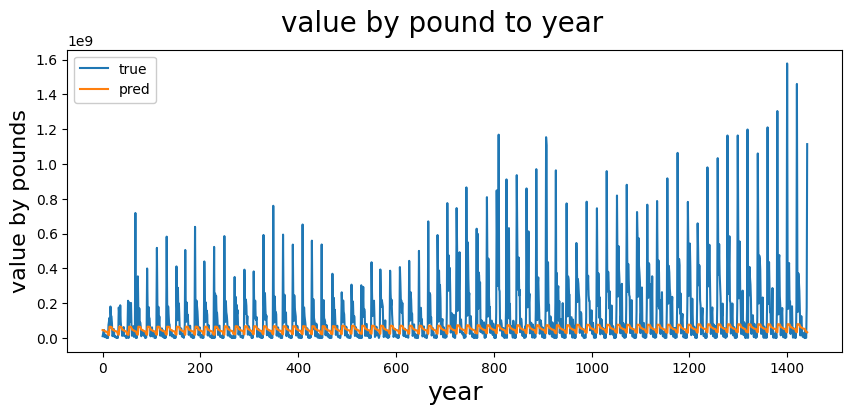

In [49]:
#true vs pred
store_list = ["true","pred"]
plt.plot(y_test, label=store_list[0])
plt.plot(y_Predict, label=store_list[1])
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100
plt.suptitle('value by pound to year', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('value by pounds', fontsize=16)
plt.legend(framealpha=1, frameon=True);

Text(0.5, 1.0, 'Residual plot')

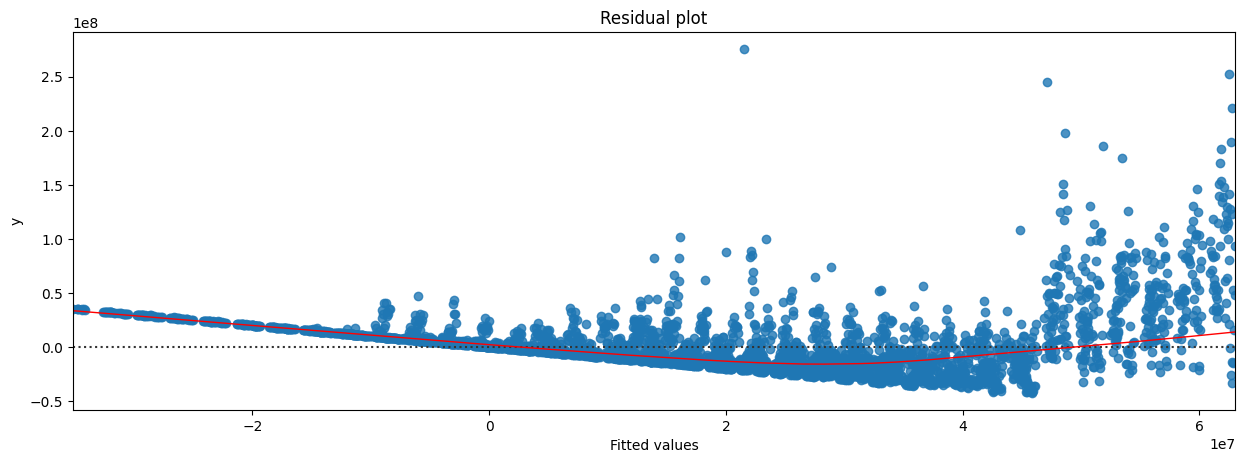

In [50]:
sns.residplot(ytrain_predict,'y', data=data[["year","month",'product_code',"income_outcome","y"]][:int(5766*0.75)],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

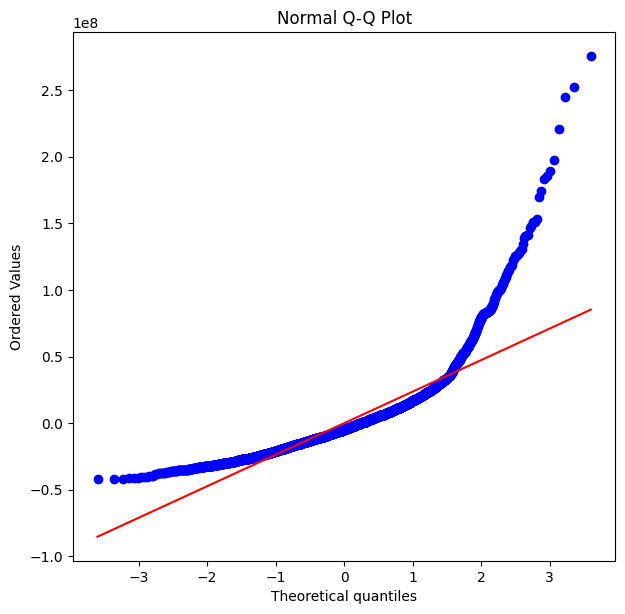

In [51]:

preds = pd.DataFrame({"preds":ytrain_predict, "true":y_train})
residuals= preds["true"] - preds["preds"]
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 1.0, 'Scale-Location plot')

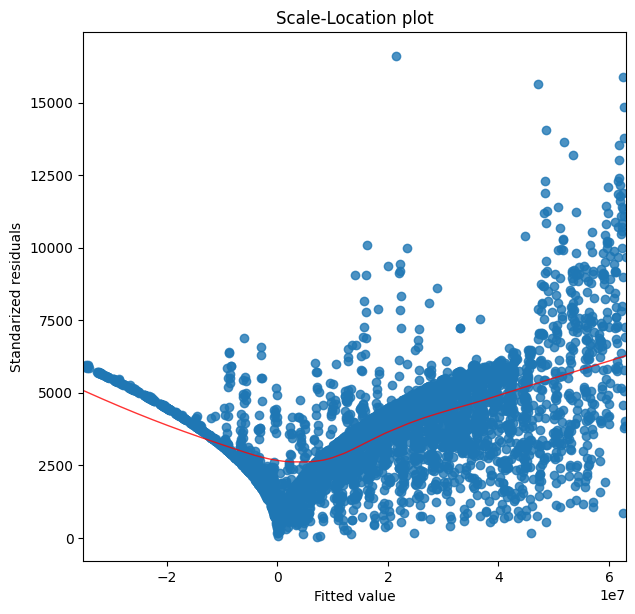

In [52]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(ytrain_predict, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.title("Scale-Location plot")

#**Knn Algorithm**

In [53]:
#Knn Algorithm
n_neighbors=3
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)
y1_knn=list(y1_knn)


train_error_knn=sqrt(mean_squared_error(y_Train, y1_knn))
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(x_test)
y2_knn=list(y2_knn)

test_error_knn=sqrt(mean_squared_error(y_test, y2_knn))
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")


Train error = 15236543.542951412 percent in Knn algorithm
Test error = 192829803.85088196 percent in knn algorithm


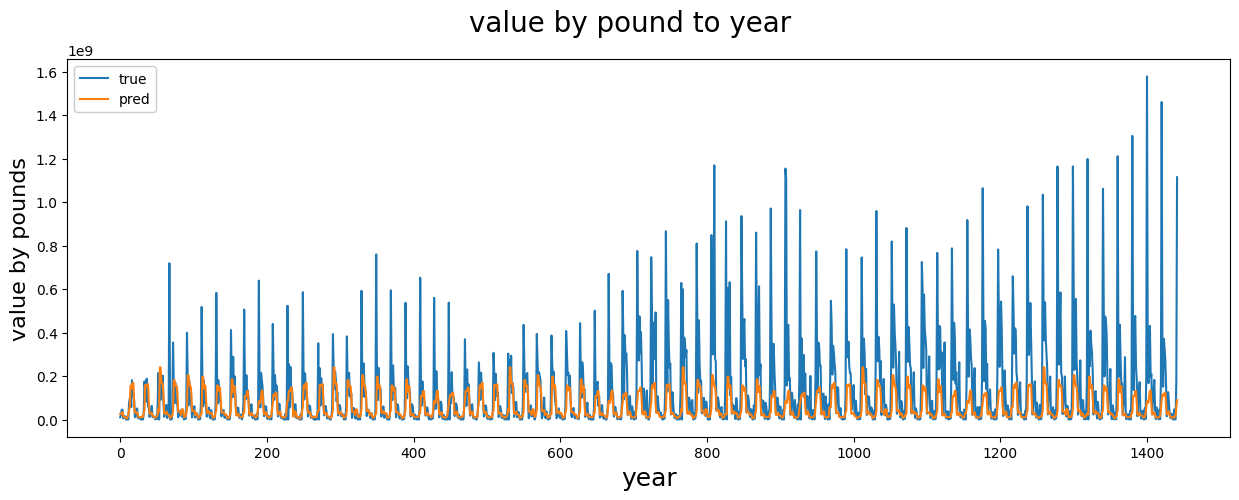

In [54]:
#true vs pred
store_list = ["true","pred"]
plt.plot(y_test, label=store_list[0])
plt.plot(y2_knn, label=store_list[1])
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['figure.dpi'] = 100
plt.suptitle('value by pound to year', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('value by pounds', fontsize=16)
plt.legend(framealpha=1, frameon=True);

Text(0.5, 1.0, 'Residual plot')

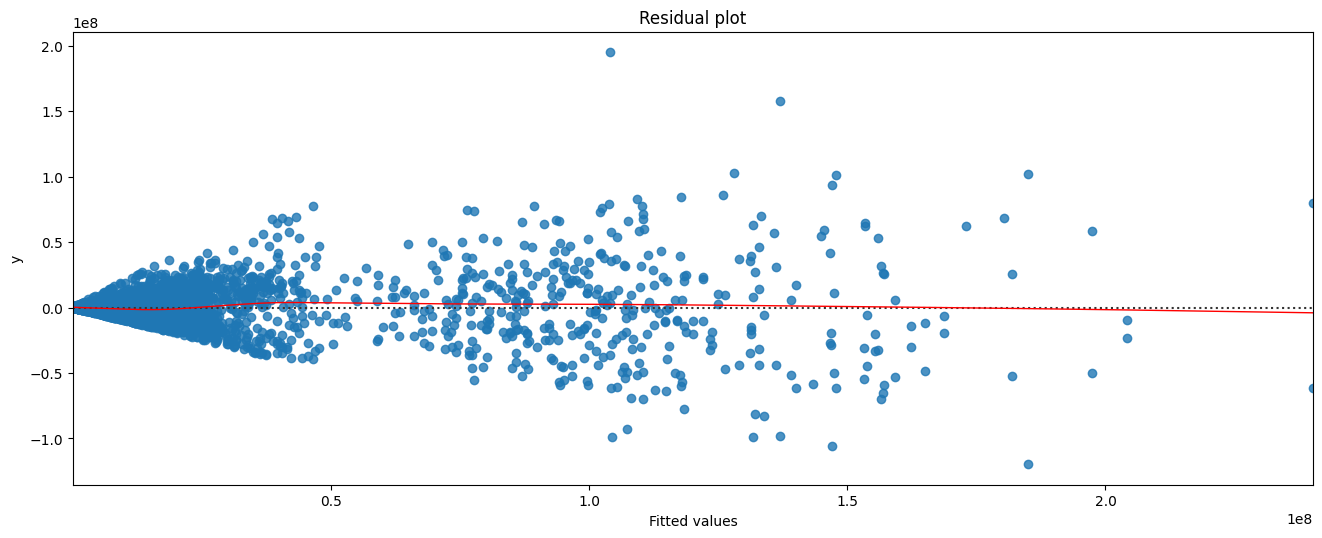

In [55]:
sns.residplot(y1_knn,'y', data=data[["year","month",'product_code',"income_outcome","y"]][:int(5766*0.75)],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

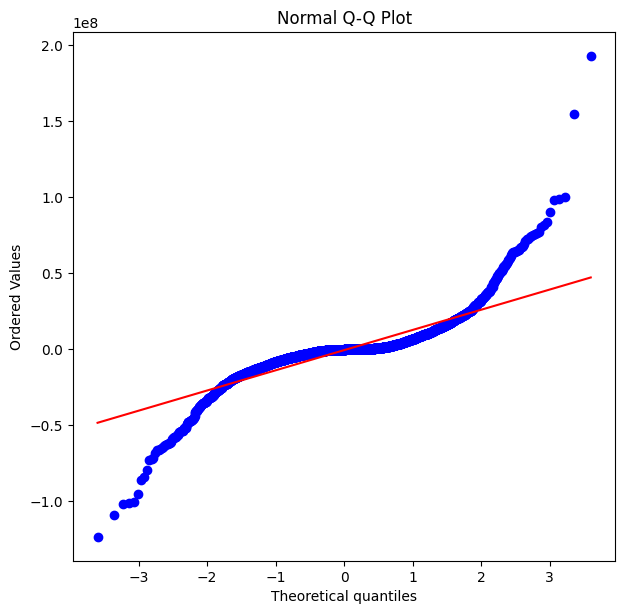

In [56]:

preds = pd.DataFrame({"preds":y1_knn, "true":y_train})
residuals= preds["true"] - preds["preds"]
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 1.0, 'Scale-Location plot')

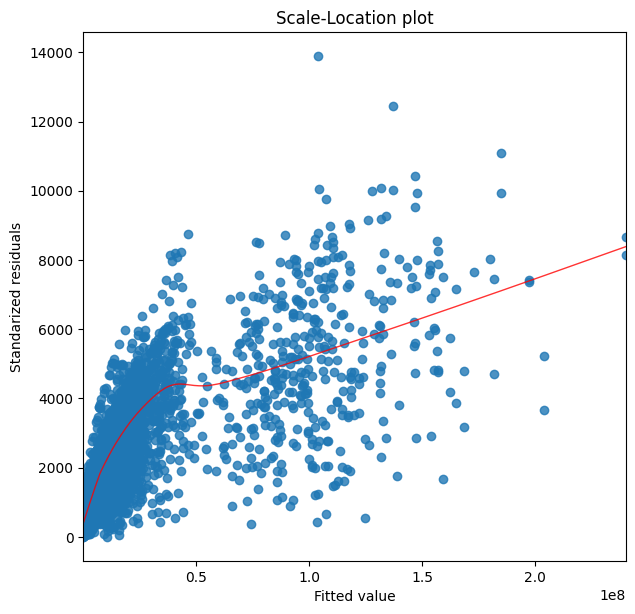

In [57]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(y1_knn, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.title("Scale-Location plot")

#**Bayesian Regression**

In [58]:
#Bayesian Regression
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

train_error_bay=sqrt(mean_squared_error(y_train, y1_reg))
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

test_error_bay=sqrt(mean_squared_error(y_test, y2_reg))
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

Train error = 33624084.19159772 percent in Bayesian Regression
Test error = 227666043.34800562 percent in Bayesian Regression


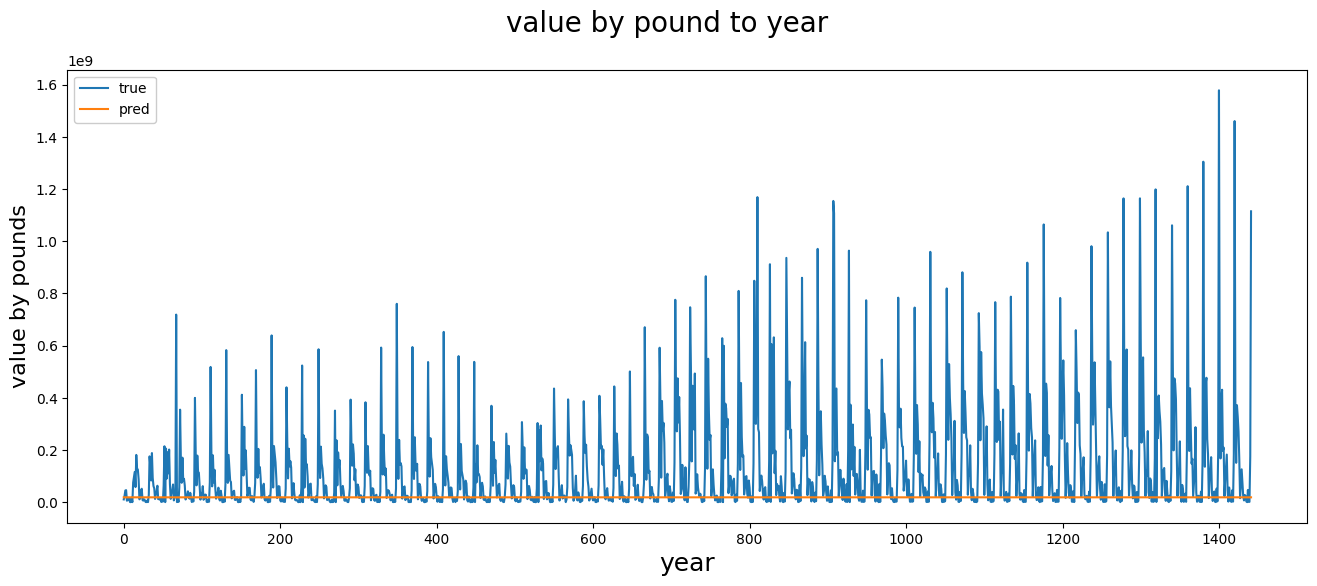

In [59]:
#true vs pred
store_list = ["true","pred"]
plt.plot(y_test, label=store_list[0])
plt.plot(y2_reg, label=store_list[1])
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['figure.dpi'] = 100
plt.suptitle('value by pound to year', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('value by pounds', fontsize=16)
plt.legend(framealpha=1, frameon=True);

Text(0.5, 1.0, 'Residual plot')

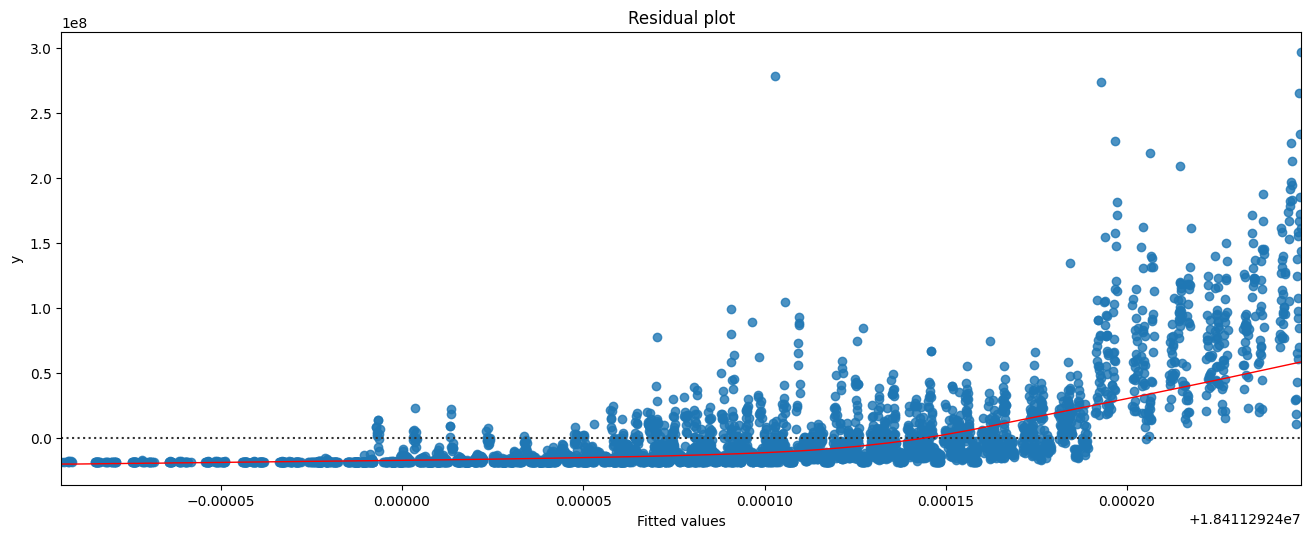

In [60]:
sns.residplot(y1_reg,'y', data=data[["year","month",'product_code',"income_outcome","y"]][:int(5766*0.75)],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

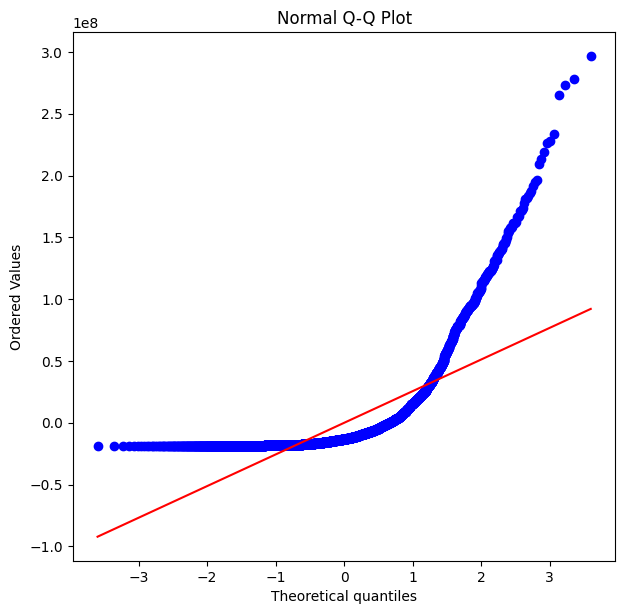

In [61]:

preds = pd.DataFrame({"preds":y1_reg, "true":y_train})
residuals= preds["true"] - preds["preds"]
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 1.0, 'Scale-Location plot')

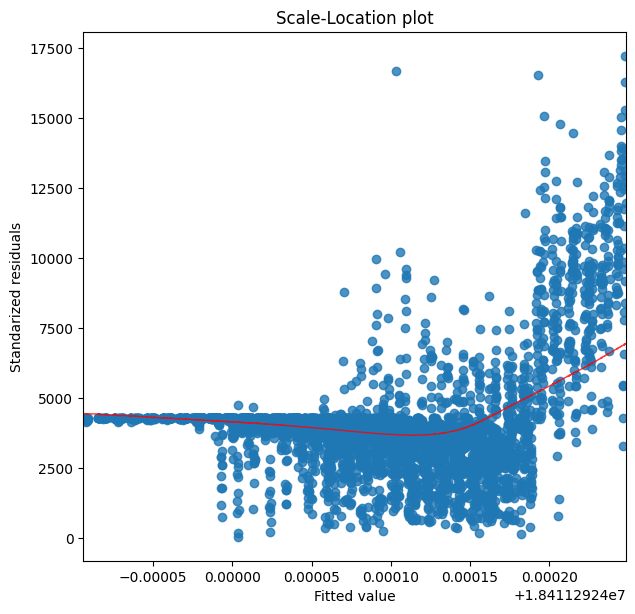

In [62]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(y1_reg, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.title("Scale-Location plot")

#**Decision Tree Regressor**

In [63]:
#Decision Tree 
dec = tree.DecisionTreeRegressor(max_depth=9)
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)

train_error_tree=sqrt(mean_squared_error(y_train, y1_dec))
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

test_error_tree=sqrt(mean_squared_error(y_test, y2_dec))
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Train error = 9616558.387593726 percent in Decision Tree Regressor
Test error = 188368306.2779852 percent in Decision Tree Regressor


In [64]:
text_representation = tree.export_text(dec)
print(text_representation)

|--- feature_0 <= 0.60
|   |--- feature_3 <= -0.16
|   |   |--- feature_0 <= -0.14
|   |   |   |--- feature_0 <= -0.51
|   |   |   |   |--- feature_2 <= -0.90
|   |   |   |   |   |--- feature_0 <= -1.07
|   |   |   |   |   |   |--- feature_2 <= -0.96
|   |   |   |   |   |   |   |--- feature_0 <= -1.25
|   |   |   |   |   |   |   |   |--- feature_1 <= -1.17
|   |   |   |   |   |   |   |   |   |--- value: [3636.80]
|   |   |   |   |   |   |   |   |--- feature_1 >  -1.17
|   |   |   |   |   |   |   |   |   |--- value: [45343.07]
|   |   |   |   |   |   |   |--- feature_0 >  -1.25
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.87
|   |   |   |   |   |   |   |   |   |--- value: [73776.83]
|   |   |   |   |   |   |   |   |--- feature_1 >  0.87
|   |   |   |   |   |   |   |   |   |--- value: [739226.75]
|   |   |   |   |   |   |--- feature_2 >  -0.96
|   |   |   |   |   |   |   |--- feature_0 <= -1.62
|   |   |   |   |   |   |   |   |--- feature_1 <= -0.58
|   |   |   |   |   |   |   |  

In [65]:
#to visualize the tree 
dot_data = tree.export_graphviz(dec, out_file=None, 
                                feature_names=["year"	,"month"	,"product_code"	,"income_outcome"],  
                                filled=True)
graph=graphviz.Source(dot_data, format="png") 
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.314405 to fit


'dtree_render.png'

In [ ]:
#to visualize the tree
#viz = dtreeviz(dec,np.array(x_train, dtype=np.float32) ,np.array(y_train, dtype=np.float32) ,
#                target_name="y",
#                feature_names=["year"	,"month"	,"product_code"	,"income_outcome"])
#viz

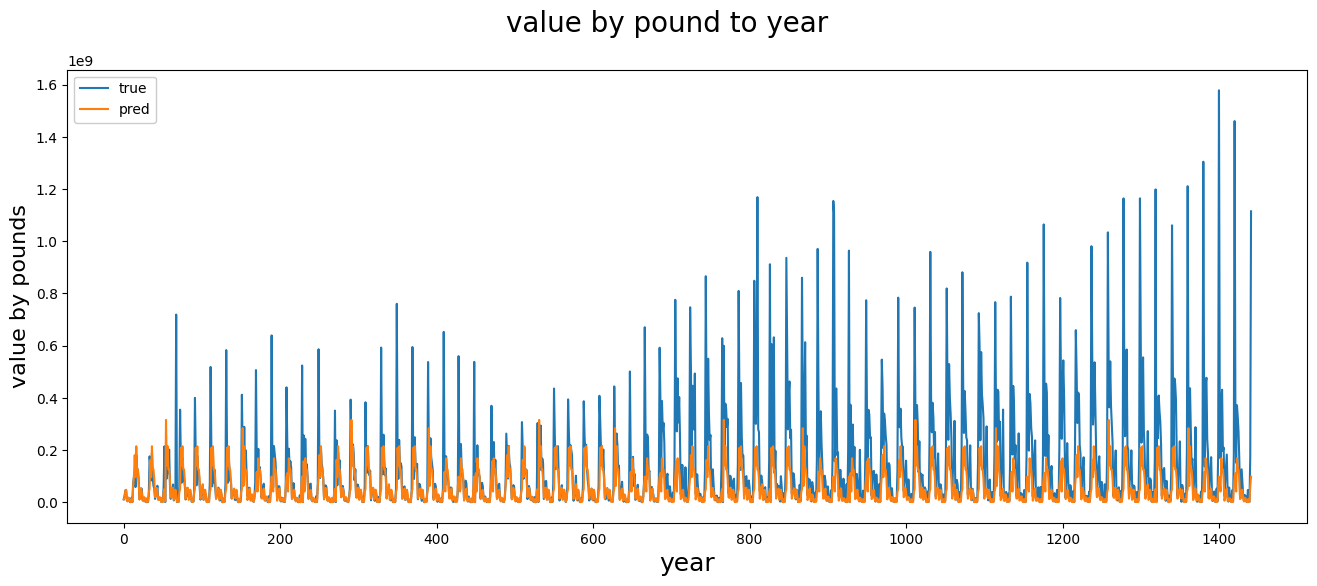

In [67]:
#true vs pred
store_list = ["true","pred"]
plt.plot(y_test, label=store_list[0])
plt.plot(y2_dec, label=store_list[1])
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['figure.dpi'] = 100
plt.suptitle('value by pound to year', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('value by pounds', fontsize=16)
plt.legend(framealpha=1, frameon=True);

Text(0.5, 1.0, 'Residual plot')

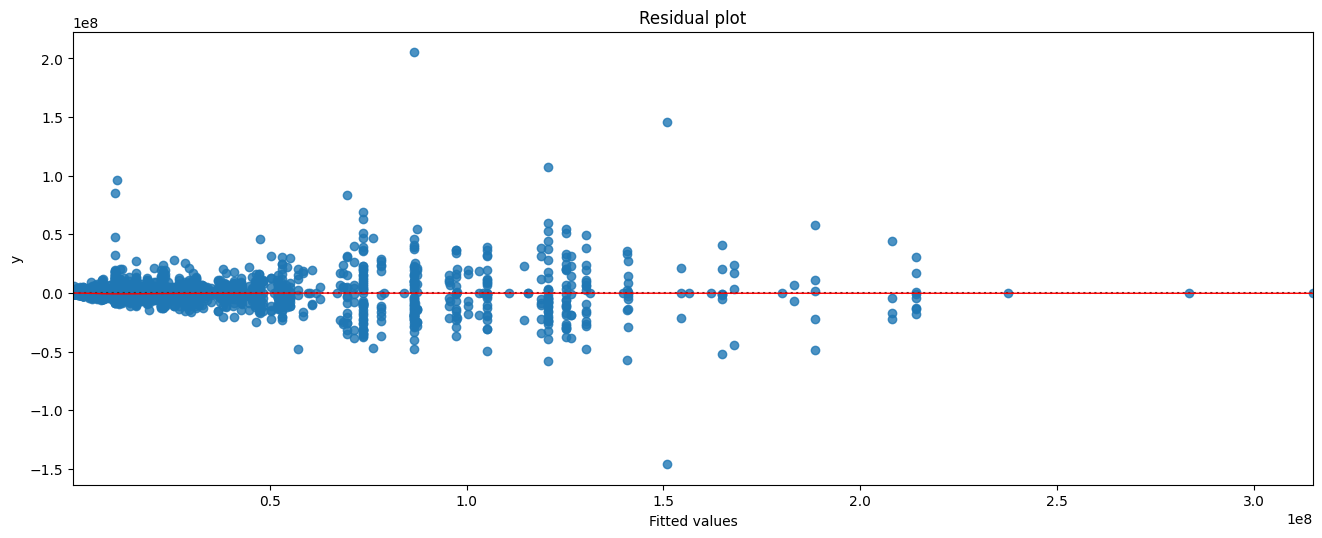

In [68]:
sns.residplot(y1_dec,'y', data=data[["year","month",'product_code',"income_outcome","y"]][:int(5766*0.75)],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

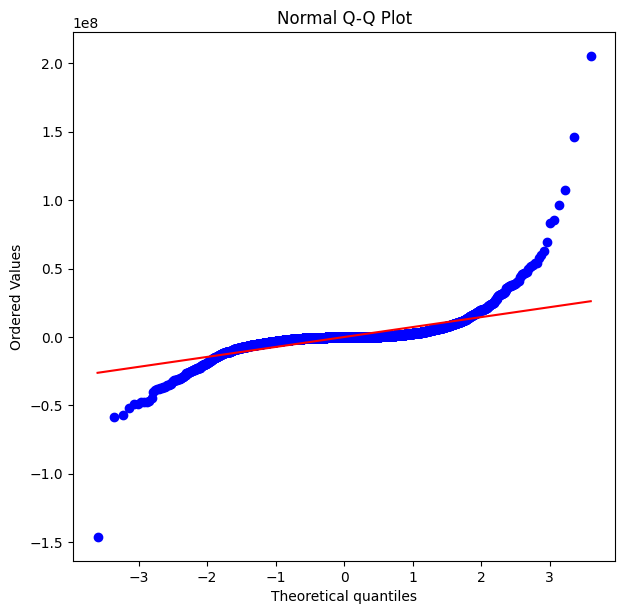

In [69]:

preds = pd.DataFrame({"preds":y1_dec, "true":y_train})
residuals= preds["true"] - preds["preds"]
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 1.0, 'Scale-Location plot')

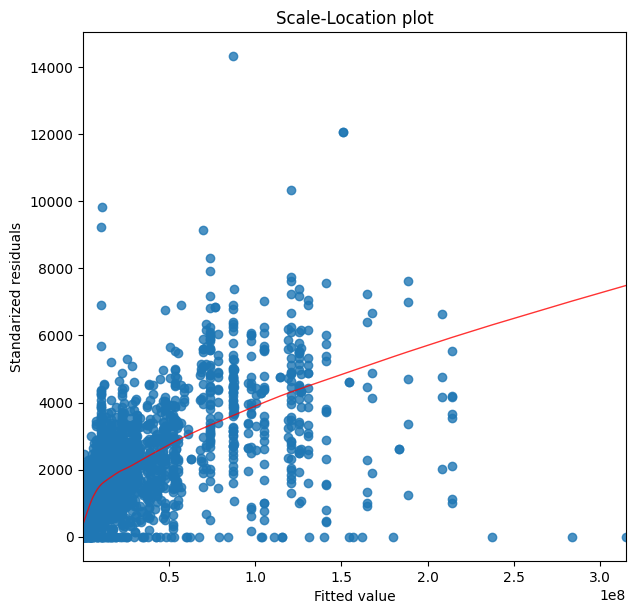

In [70]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(y1_dec, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.title("Scale-Location plot")

#**SVM**

In [71]:
svm_reg=SVC(kernel='rbf')
#svm_reg=SVC()
svm_reg.fit(x_train,y_train)
y1_svm=svm_reg.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(x_test)
y2_svm=list(y2_svm)

train_error_svm=sqrt(mean_squared_error(y_train, y1_svm))
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

test_error_svm=sqrt(mean_squared_error(y_test, y2_svm))
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

Train error = 8461354.180370223 percent in SVM Regressor
Test error = 207948180.91069743 percent in SVM Regressor


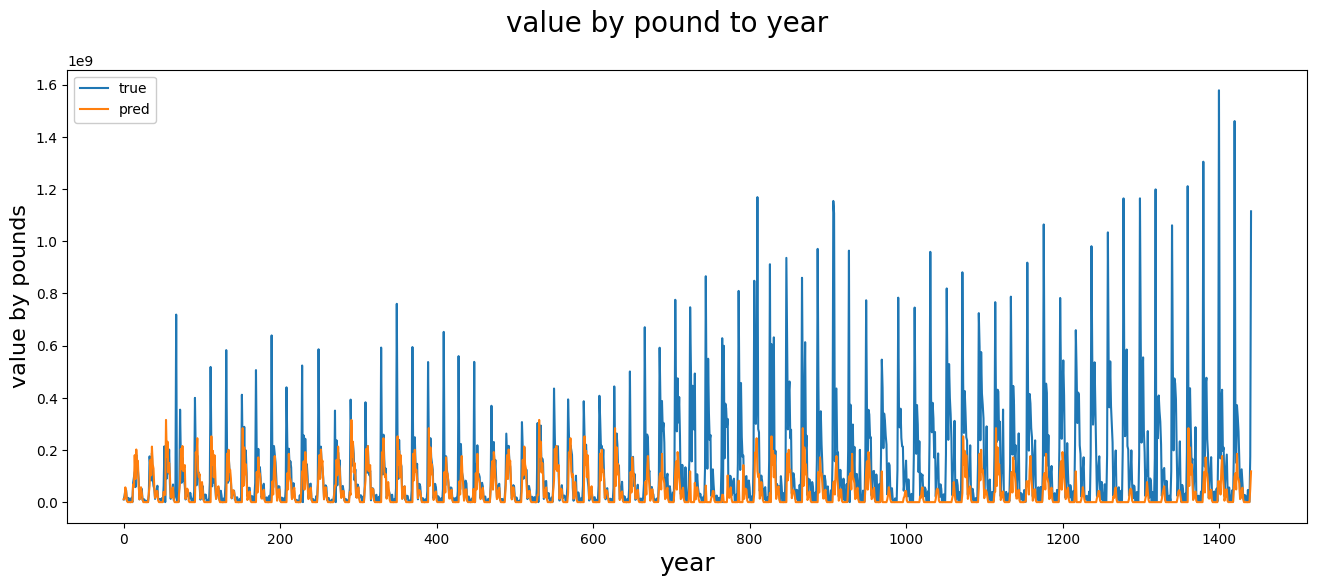

In [72]:
#pred vs true
store_list = ["true","pred"]
plt.plot(y_test, label=store_list[0])
plt.plot(y2_svm, label=store_list[1])
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['figure.dpi'] = 100
plt.suptitle('value by pound to year', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('value by pounds', fontsize=16)
plt.legend(framealpha=1, frameon=True);



Text(0.5, 1.0, 'Residual plot')

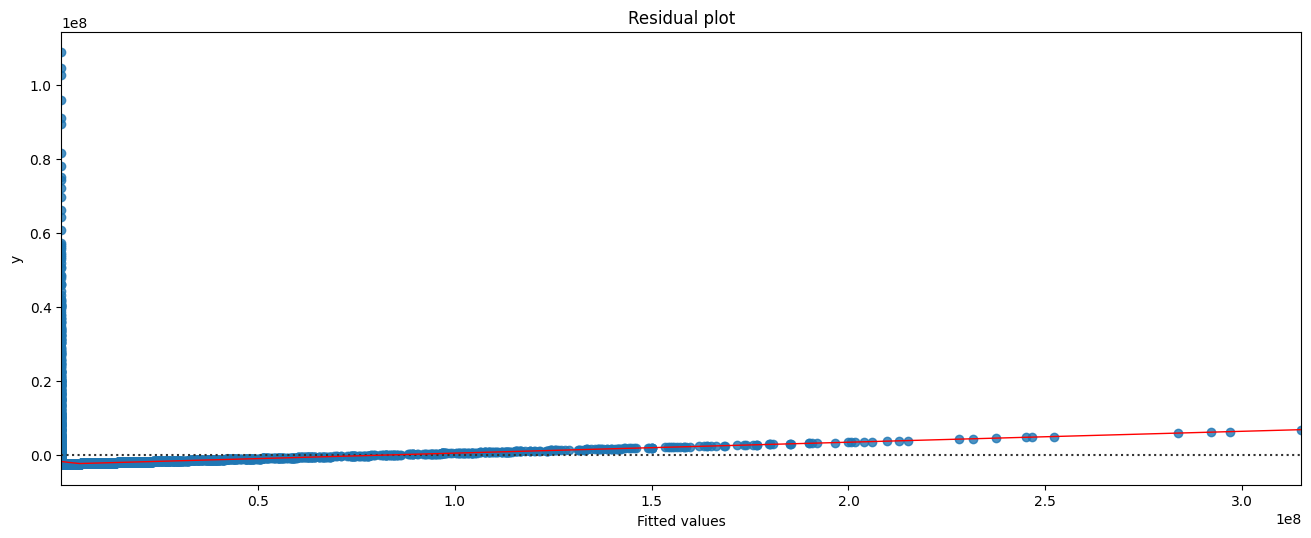

In [73]:
sns.residplot(y1_svm,'y', data=data[["year","month",'product_code',"income_outcome","y"]][:int(5766*0.75)],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

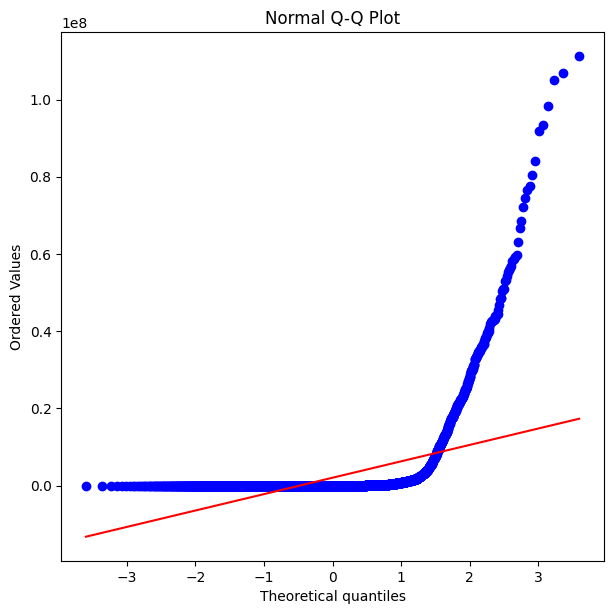

In [74]:

preds = pd.DataFrame({"preds":y1_svm, "true":y_train})
residuals= preds["true"] - preds["preds"]
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 1.0, 'Scale-Location plot')

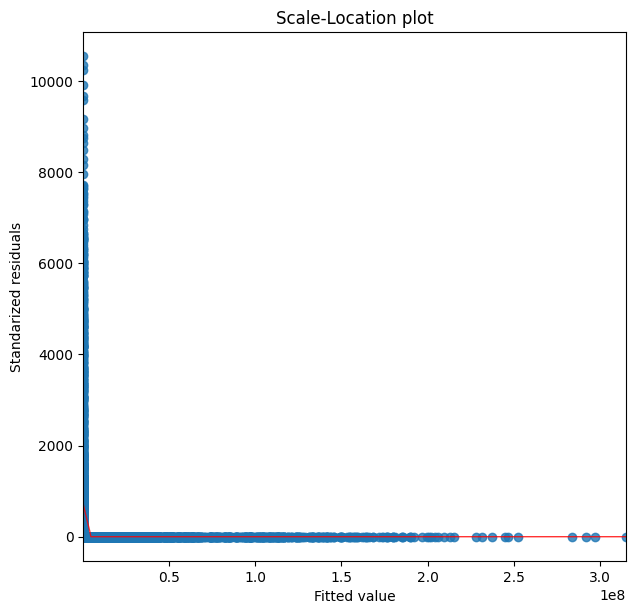

In [75]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(y1_svm, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.title("Scale-Location plot")

#all regression models


In [80]:
#this is rbg_histo_gentic_threshold_without_ids_scaled_suspect_non_float_handle
train_error=[train_error_ridge,train_error_knn,train_error_bay,train_error_tree,train_error_svm]
test_error=[test_error_ridge,test_error_knn,test_error_bay,test_error_tree,test_error_svm]

col={'Train Error':train_error,'Test Error':test_error}
models=['Ridge Regression','Knn','Bayesian Regression','Decision Tree','SVM']
df=DataFrame(data=col,index=models)
df

,Train Error,Test Error
Ridge Regression,2.654856e+07,2.108995e+08
Knn,1.523654e+07,1.928298e+08
Bayesian Regression,3.362408e+07,2.276660e+08
Decision Tree,9.616558e+06,1.883683e+08
SVM,8.461354e+06,2.079482e+08


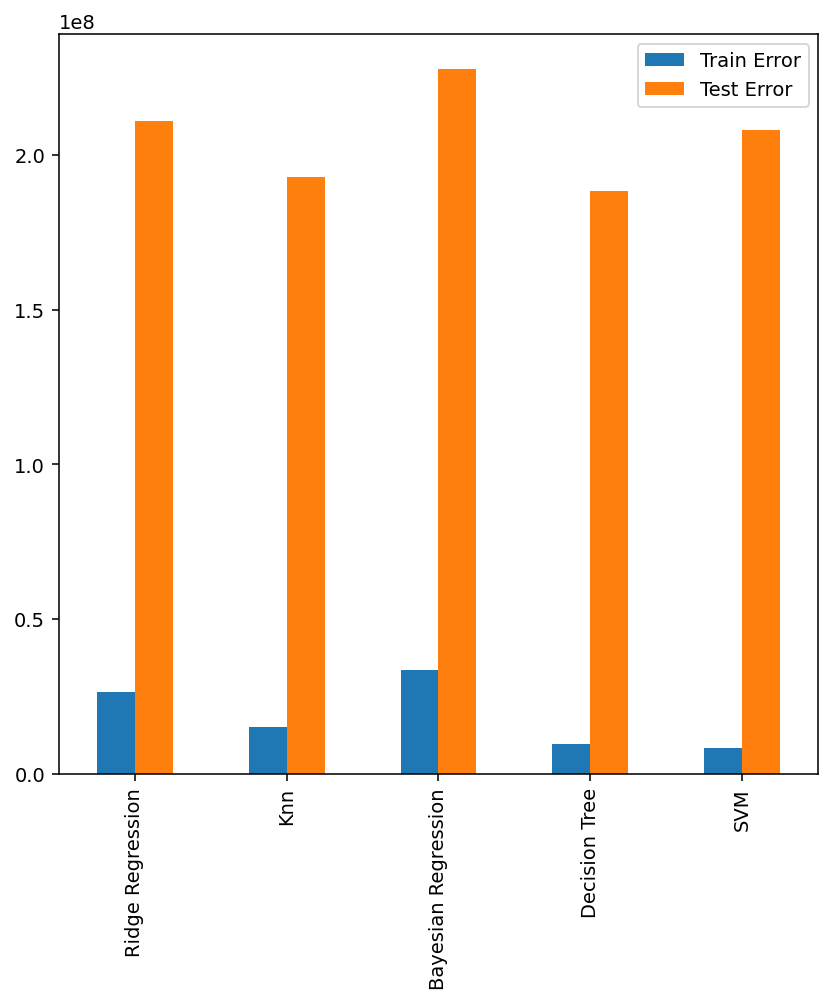

In [83]:
#this is rbg_histo_gentic_threshold_without_ids_scaled_suspect_non_float_handle
plt.rcParams['figure.figsize'] = [7, 7]
df.plot(kind='bar')

#all models

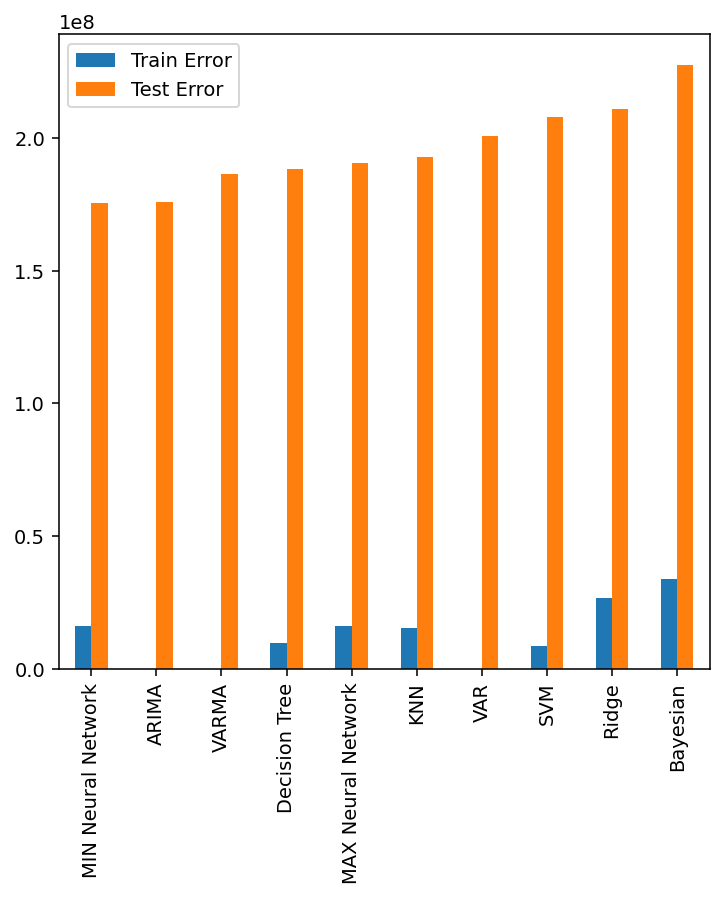

In [78]:
train_error=[8461354.180,26548555.630,15236543.542,33624084.191,9616558.387,16161590.612,16236520.371,0,0,0]
test_error=[207948180.910,210899504.777,192829803.850,227666043.348,188368306.277,175647859.808,190587877.925,200917332.141, 186331767.329, 175859969.678]
models=['SVM','Ridge',"KNN",'Bayesian','Decision Tree','MIN Neural Network',"MAX Neural Network","VAR","VARMA","ARIMA"]
col={'Train Error':train_error,'Test Error':test_error}
from pandas import DataFrame
df=DataFrame(data=col,index=models)
plt.rcParams["figure.dpi"] = 140
df = df.sort_values(by =['Test Error']) 
df.plot(kind='bar',figsize=(6,6))